In [1]:
import sys
sys.path.append('../')
from model.SegNet import *
from utils.generate_data import *
from keras.callbacks import *
from keras.models import *
from keras.layers import *
from keras.optimizers import *

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]='2'

/home/possibleit/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/possibleit/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/possibleit/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/possibleit/anaconda3/envs/gpu/lib/pyt

In [2]:
model = segnet(512,512,3,12)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_____________________________________________________

In [3]:
weight_path = '/home/possibleit/文档/keras/keras-Semantic-Segmentation/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
model.load_weights(weight_path,by_name=True)

In [4]:
log_dir = 'log/segnet'
model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=["accuracy"])
tb_cb = TensorBoard(log_dir=log_dir)
model_checkpoint = keras.callbacks.ModelCheckpoint(log_dir + '/CamVid_model.hdf5', monitor='val_loss',verbose=1,save_best_only=True)
rl = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3,
    verbose=1
)
es = EarlyStopping(
    monitor='val_loss', 
    min_delta=0, 
    patience=10, 
    verbose=1
)
csv_logger = CSVLogger(log_dir + '/training.log')

In [5]:
train_data = trainGenerator(batch_size=1)
valid_data = validLoad(batch_size=1)
test_data = testGenerator()

In [6]:
history = model.fit_generator(train_data,
                              steps_per_epoch=200,
                              epochs=60,
                              validation_steps=10,
                              validation_data=valid_data,
                              callbacks=[model_checkpoint,tb_cb, rl, es, csv_logger])

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Found 101 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
Epoch 1/60
Found 101 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
200/200 [==============================] - 119s 596ms/step - loss: 1.3790 - accuracy: 0.5374 - val_loss: 1.2702 - val_accuracy: 0.5806

Epoch 00001: val_loss improved from inf to 1.27022, saving model to log/segnet/CamVid_model.hdf5
Epoch 2/60
200/200 [==============================] - 113s 567ms/step - loss: 0.9290 - accuracy: 0.6802 - val_loss: 0.9080 - val_accuracy: 0.7337

Epoch 00002: val_loss improved from 1.27022 to 0.90799, saving model to log/segnet/CamVid_model.hdf5
Epoch 3/60
200/200 [==============================] - 107s 536ms/step - loss: 0.8311 - accuracy: 0.7107 - val_loss: 0.8734 - val_accuracy: 0.7564

Epoch 00003: val_loss improved from 0.90799 to 0.87340, saving model to


Epoch 00033: val_loss improved from 0.28881 to 0.28731, saving model to log/segnet/CamVid_model.hdf5
Epoch 34/60
200/200 [==============================] - 152s 760ms/step - loss: 0.3055 - accuracy: 0.8754 - val_loss: 0.4077 - val_accuracy: 0.8899

Epoch 00034: val_loss did not improve from 0.28731
Epoch 35/60
200/200 [==============================] - 142s 710ms/step - loss: 0.3420 - accuracy: 0.8755 - val_loss: 0.3556 - val_accuracy: 0.8479

Epoch 00035: val_loss did not improve from 0.28731
Epoch 36/60
200/200 [==============================] - 134s 672ms/step - loss: 0.2889 - accuracy: 0.8782 - val_loss: 0.3323 - val_accuracy: 0.8727

Epoch 00036: val_loss did not improve from 0.28731

Epoch 00036: ReduceLROnPlateau reducing learning rate to 7.81249980263965e-07.
Epoch 37/60
200/200 [==============================] - 136s 679ms/step - loss: 0.2904 - accuracy: 0.8772 - val_loss: 0.3781 - val_accuracy: 0.8672

Epoch 00037: val_loss did not improve from 0.28731
Epoch 38/60
200/200 [=

In [7]:
model.save_weights(log_dir+'/segnet_weight.h5')

In [8]:
(x, y) = trainGenerator(batch_size=1).__next__()
img = model.predict(x)
img = np.squeeze(img)
img.shape
m = test_data.__next__()
m.shape

Found 367 images belonging to 1 classes.
Found 367 images belonging to 1 classes.


(1, 512, 512, 3)

In [9]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

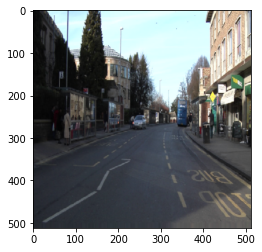

(512, 512, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


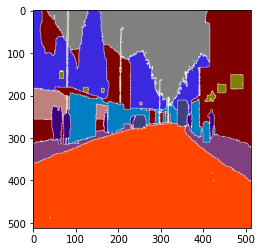

In [10]:
x = np.squeeze(x)
y = np.squeeze(y)
plt.imshow(x)
plt.show()
res = np.empty([512,512,3], dtype = int)
print(res.shape)
for i in range(512):
    for j in range(512):
        for k in range(12):
            if y[i][j][k] == 1:
                res[i][j] = COLOR_DICT[k]
                break
plt.imshow(res)
plt.show()

(512, 512, 3)


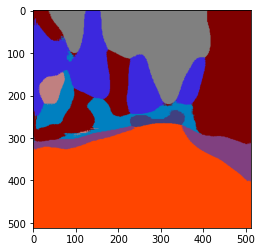

In [11]:
img2 = np.empty([512,512,3], dtype = int)
print(img2.shape)
for i in range(512):
    for j in range(512):
        img2[i][j] = COLOR_DICT[np.argmax(img[i][j])]
plt.imshow(img2)
plt.show()

(512, 512, 3)


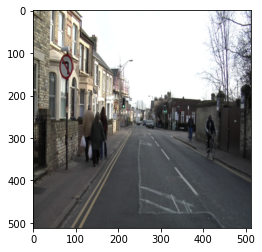

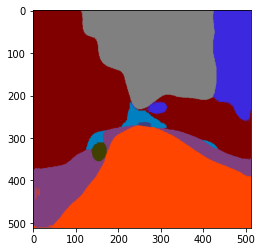

In [12]:
img = model.predict(m)
img = np.squeeze(img)
img2 = np.empty([512,512,3], dtype = int)
print(img2.shape)
for i in range(512):
    for j in range(512):
        img2[i][j] = COLOR_DICT[np.argmax(img[i][j])]
m = np.squeeze(m)
plt.imshow(m)
plt.show()
plt.imshow(img2)
plt.show()